In [1]:
import pandas as pd
import os

In [5]:
dirr = os.path.join('..', 'Swat_Dataset','SWaT_Dataset.csv')

In [4]:
os.getcwd()

"g:\\Rahul's Work\\AICrit-MLOps\\notebook"

In [6]:
df = pd.read_csv(dirr)

In [8]:
df['LIT101.Pv']

0         729.787300
1         729.787300
2         731.632141
3         731.749939
4         732.377900
             ...    
129596    807.154500
129597    807.154500
129598    808.096558
129599    808.096558
129600    808.096558
Name: LIT101.Pv, Length: 129601, dtype: float64

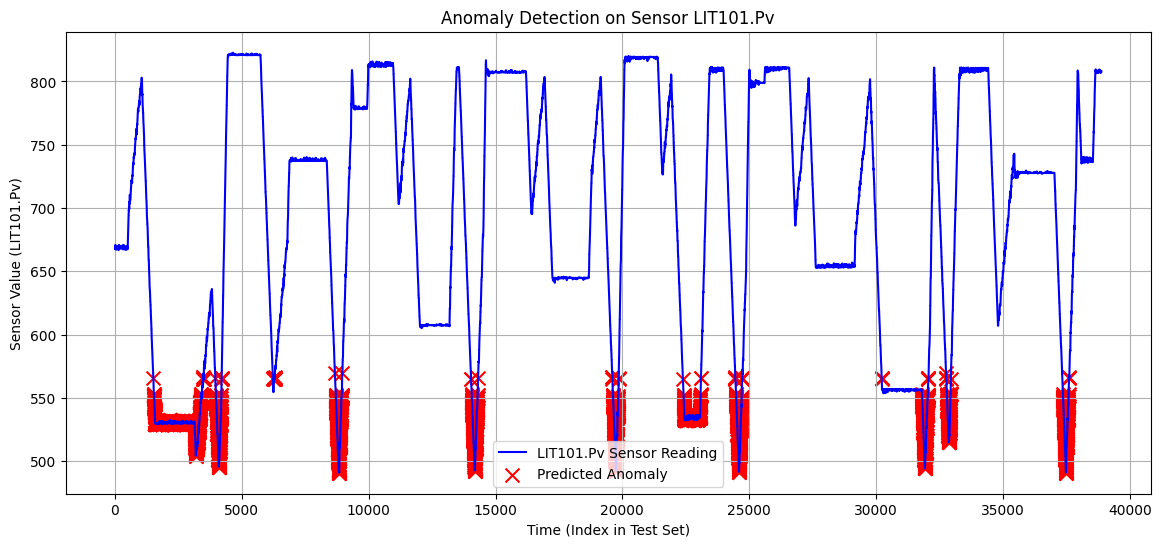

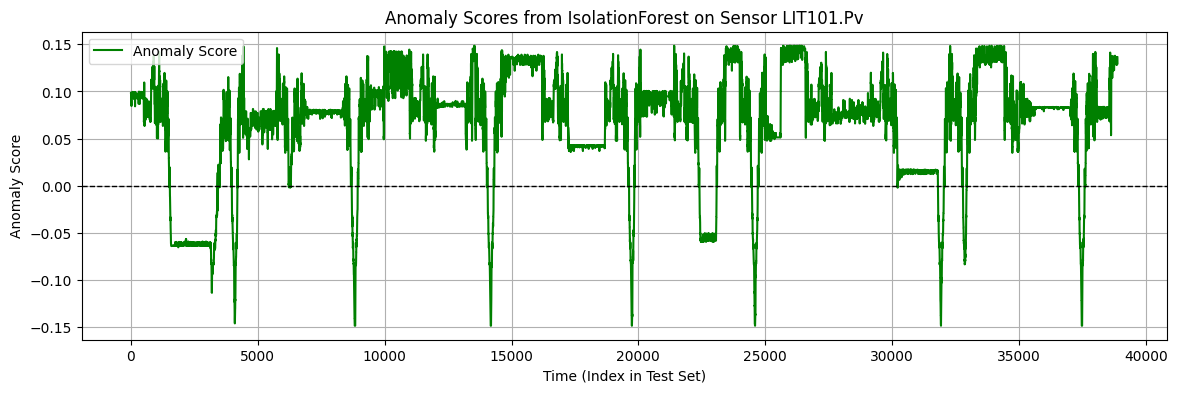

In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# -----------------------------
# 1. Load the Dataset
# -----------------------------
# Define the path to the dataset CSV file.
dirr = os.path.join('..', 'Swat_Dataset', 'SWaT_Dataset.csv')
df = pd.read_csv(dirr)

# -----------------------------
# 2. Select and Preprocess the Sensor Data
# -----------------------------
# We use only the sensor 'LIT101.Pv'
sensor_data = df['LIT101.Pv'].values.reshape(-1, 1)

# Split data into training and testing sets.
# Here, we assume the first 70% is used for training (normal data) 
# and the remaining 30% for testing.
split_index = int(0.7 * len(sensor_data))
train_data = sensor_data[:split_index]
test_data = sensor_data[split_index:]

# Scale the sensor data
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

# -----------------------------
# 3. Train IsolationForest for Anomaly Detection
# -----------------------------
# Train on the training data which we assume to be mostly normal.
clf = IsolationForest(contamination=0.05, random_state=42)
clf.fit(train_scaled)

# Predict anomalies on the test set.
# IsolationForest returns 1 for normal and -1 for anomaly.
predictions = clf.predict(test_scaled)
# Convert predictions to binary: 0 for normal, 1 for anomaly.
anomaly_labels = np.where(predictions == 1, 0, 1)

# Optionally, compute the anomaly score (lower scores indicate more abnormal)
anomaly_scores = clf.decision_function(test_scaled)

# -----------------------------
# 4. Plot the Sensor Values and Anomaly Predictions
# -----------------------------
plt.figure(figsize=(14, 6))

# Plot raw sensor data for test set.
plt.plot(test_data, label='LIT101.Pv Sensor Reading', color='blue')

# Overlay the anomaly points.
# We mark the points where the model predicted an anomaly.
anomaly_indices = np.where(anomaly_labels == 1)[0]
plt.scatter(anomaly_indices, test_data[anomaly_indices], 
            color='red', marker='x', s=100, label='Predicted Anomaly')

plt.xlabel('Time (Index in Test Set)')
plt.ylabel('Sensor Value (LIT101.Pv)')
plt.title('Anomaly Detection on Sensor LIT101.Pv')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# 5. (Optional) Plot Anomaly Scores
# -----------------------------
plt.figure(figsize=(14, 4))
plt.plot(anomaly_scores, label='Anomaly Score', color='green')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Time (Index in Test Set)')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores from IsolationForest on Sensor LIT101.Pv')
plt.legend()
plt.grid(True)
plt.show()
